**WIE3007 GROUP ASSIGNMENT FINDINGS**

Raw Dataset Source
https://archive.ics.uci.edu/dataset/352/online+retail

**1.0 Introduction**

In [ ]:
In this assignment, we will delve into the fascinating world of customer insights and predictive analytics within the context of online retail. 
Our chosen subject is the renowned Online Retail II dataset, boasting rich transaction data from a UK-based online store spanning two years (2009-2011).
Through the application of the SEMMA (Sample, Explore, Modify, Model, Assess) methodology, we aim to unlock valuable knowledge about customer behavior 
and purchase patterns within this dataset.

**2.0 Discussion**

**2.1 Sample**

The Sample stage is our first encounter with the rich data within the Online Retail II dataset. 
This stage lays the foundation for the entire analysis, so taking our time and selecting the right approach is crucial. 

The dataset seems vast, with over 1 million transactions. Analyzing the entire dataset might be computationally expensive and unnecessary. 
Therefore, we started with a smaller sample which we only took up 50 stock codes from the overall dataset.
For sampling, we use just about 10% of the dataset (3790 rows fetched) and the method use for sampling is random stratified sampling

     Frequency of customers based on their country

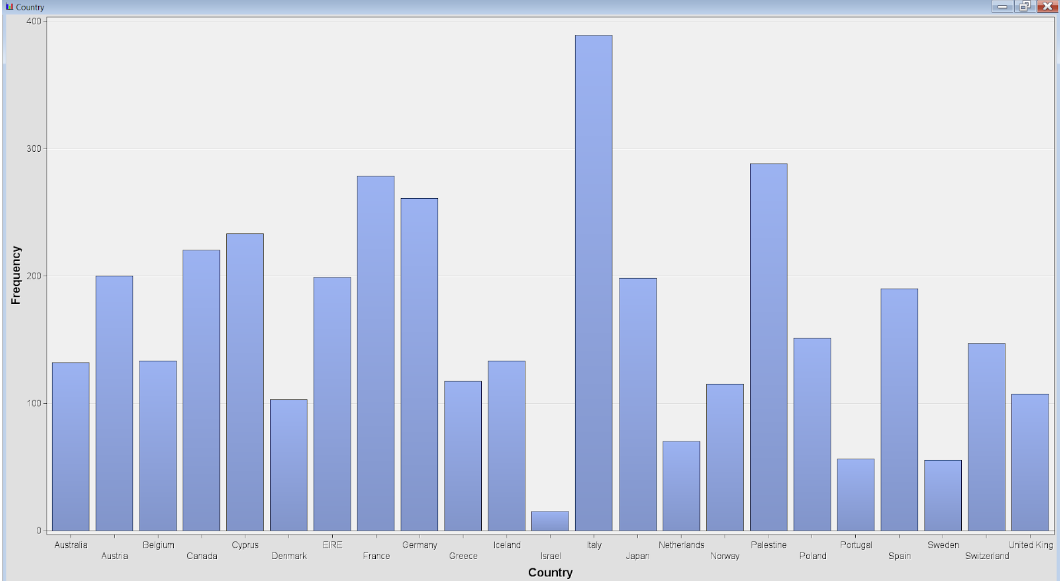
The figure shows that the highest number of orders are from Italy and the lowest number is from Israel

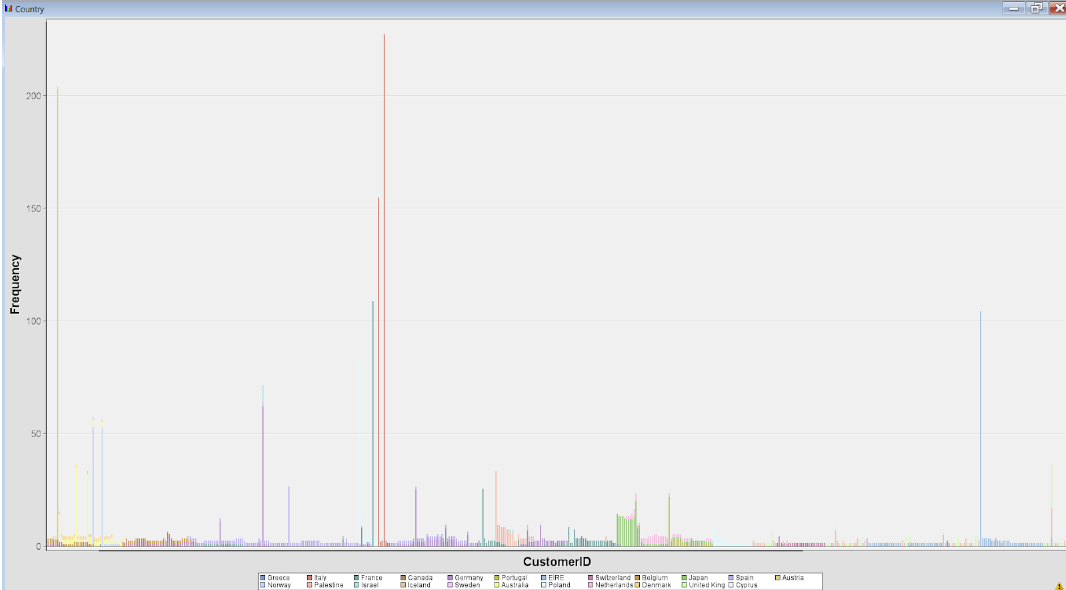
The graph shows that the Italy (Orange Line) has the highest frequency of customers’ origins.
     Stock Code Sales
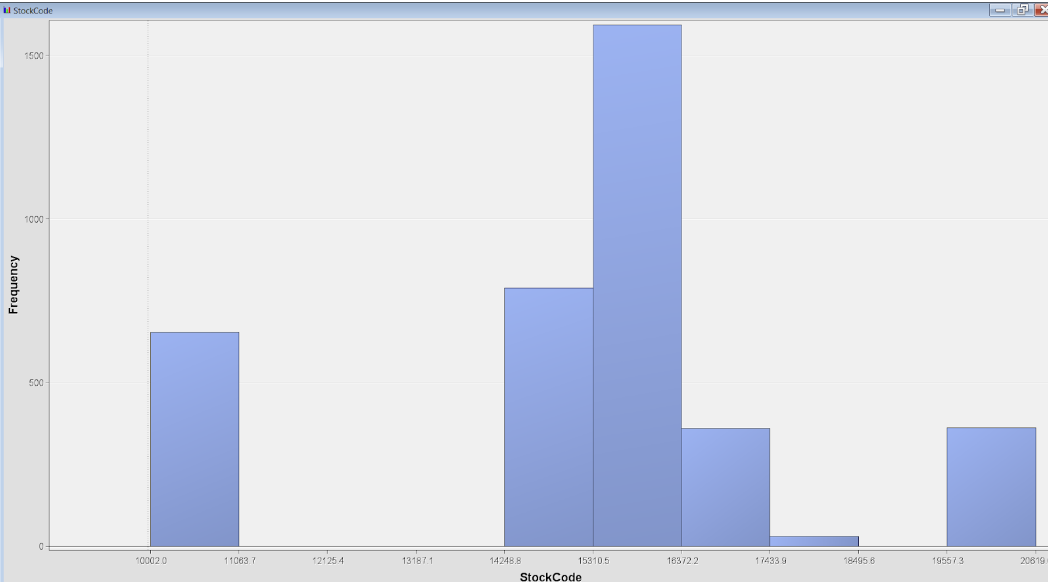
Stock Code 15310 contributes to the highest sales, followed by Stock Code 16372.
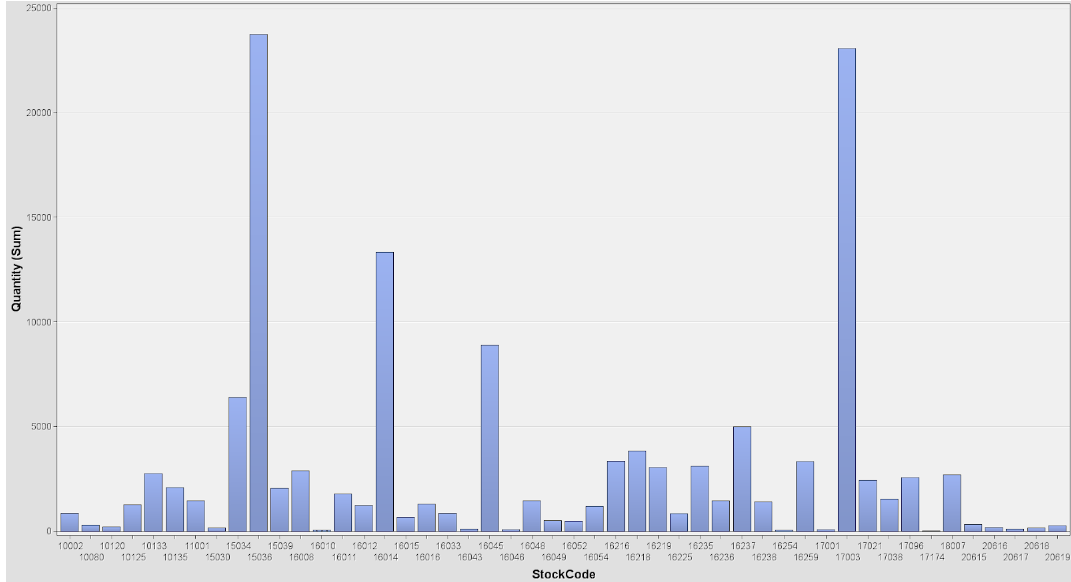
Stock Code 15036 contributes to the highest amount of quantity of product bought which has a total amount of 23752 pieces/unit
Followed up by Stock Code 17003 with amount of 23054 pieces/unit
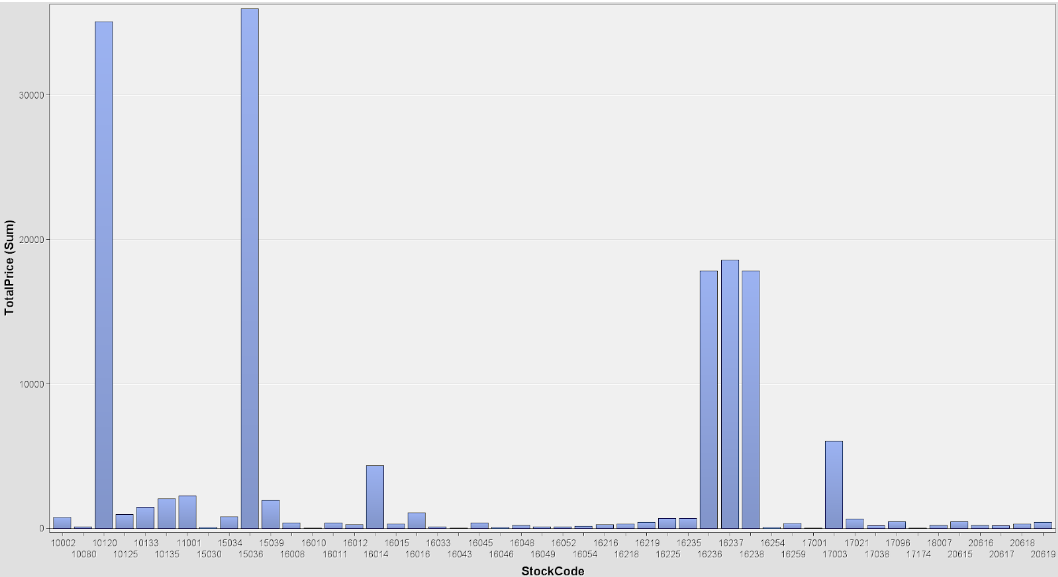
Stock Code 15036 contributes to the highest amount of quantity of product bought which has a total amount of 23752 pieces/unit
Followed up by Stock Code 17003 with amount of 23054 pieces/unit
     Volume of Sales
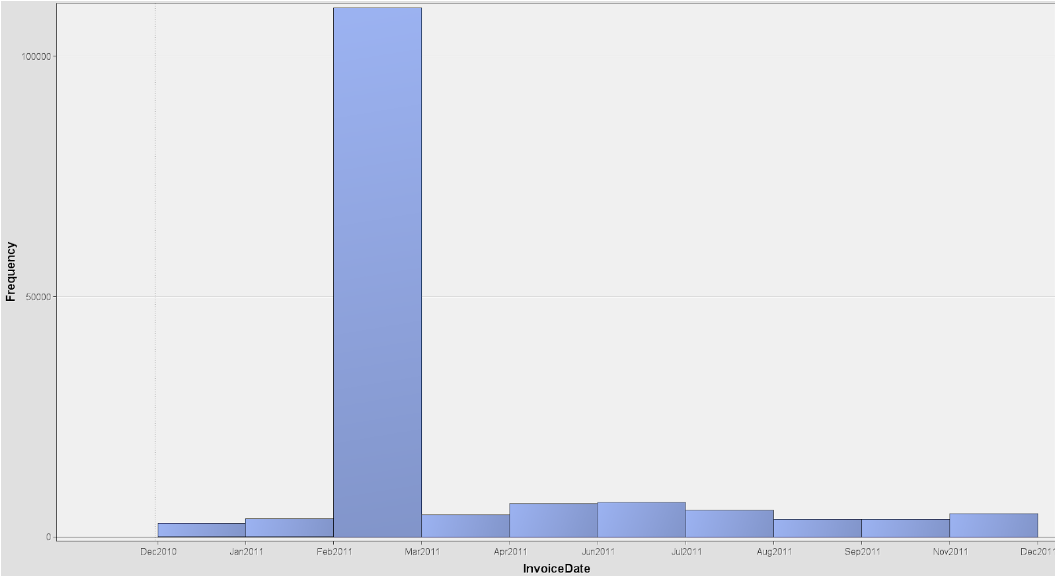
Most order sales are on 23 march 2011  07:28:48



.


**2.2 Explore**

Exploration phase is a process of analyzing and investigating datasets, hence summarizing their main characters, 
often using visual methods. 
The primary goal of the exploration phase is to discover underlying patterns, extract interesting correlations, frequent patterns, associations or casual structures among sets of items in transactional databases or other databases.

     Graph Exploration
Graph exploration allows our team to analyze and identify the hidden trend behind our dataset.
         
         Sales Distribution by country
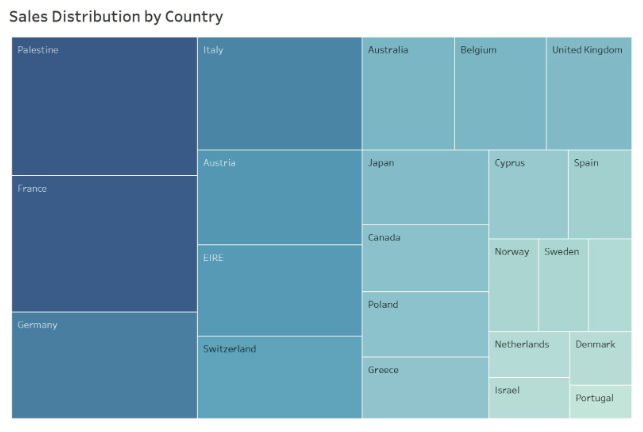

         Sales Trend Over Time
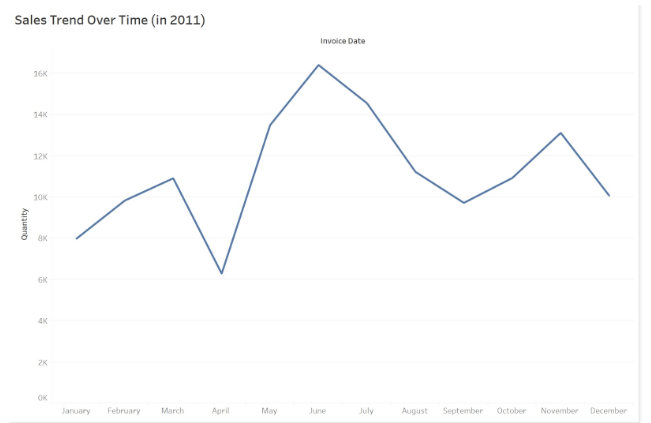

         Successful Price Points
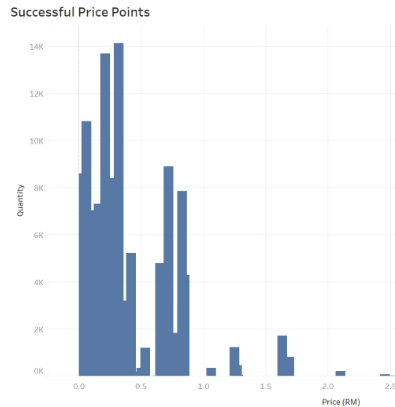

     Association Rule


         Statistics Line Plo
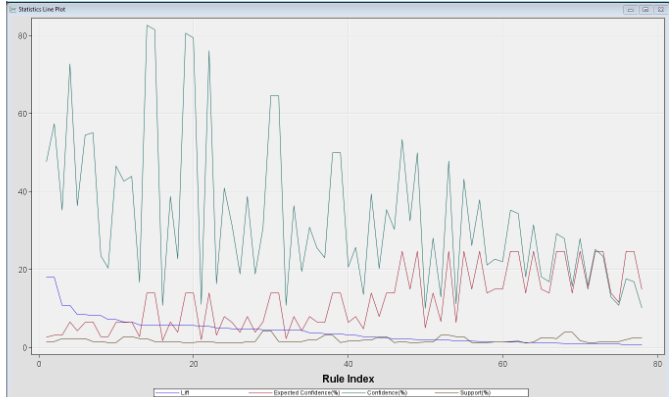t
 a glance.
t
         S
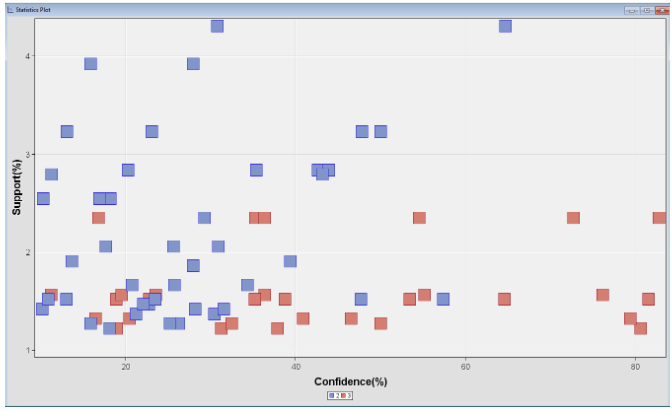

tatistic Plot
       
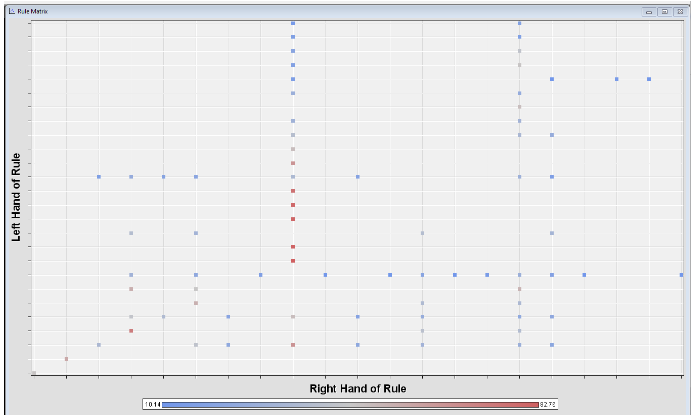

  Rule Matrix
      
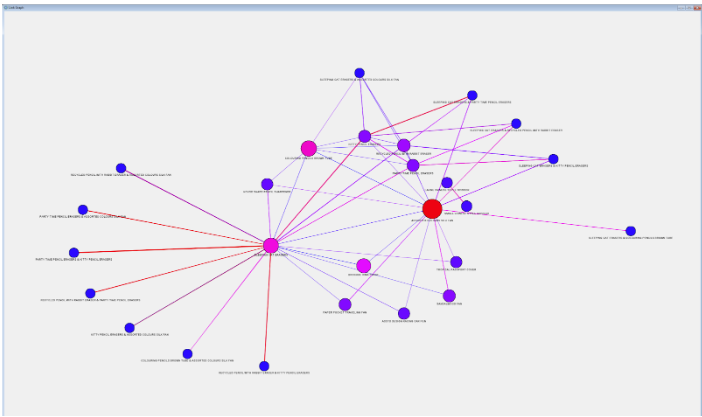

   Link Graph
   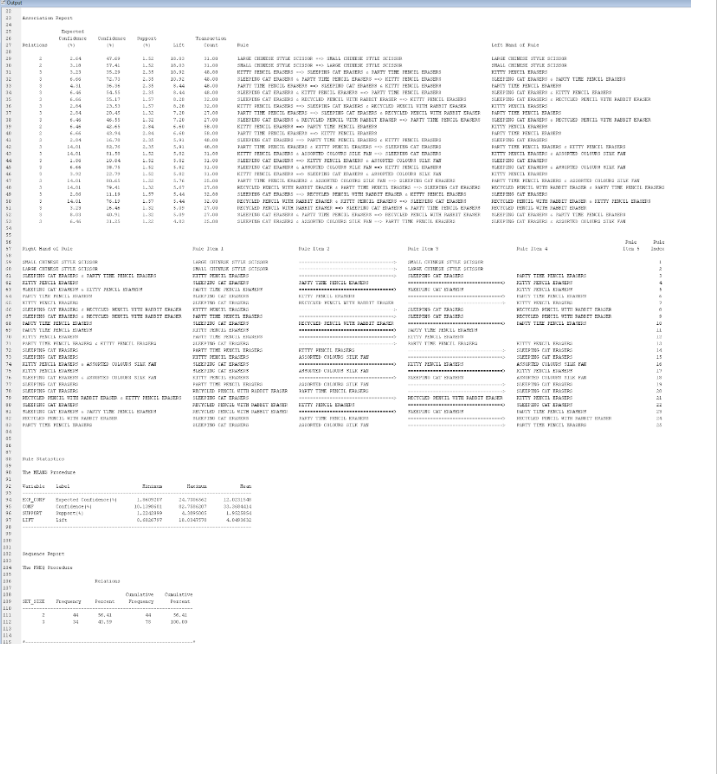      Output


**2.3 Modify**

In [ ]:
In the Modify phase of the analysis, several enhancements were applied to ensure the dataset's integrity and suitability for modeling.
The dataset originally comprised information on invoices, stock codes, descriptions, quantities, 
invoice dates, prices, total prices, customer IDs, and countries, totaling approximately 3791 rows.

To facilitate further analysis and insights, the following modifications were made using Microsoft Excel queries:


     1. Handling Missing Values

        a. Identification:
We thoroughly assessed the dataset to identify any instances of missing values where we identified that the “CustomerID” field within the EIRE country has two missing values.

        b. Imputation Strategy:

To address this, an imputation strategy was employed. The missing "CustomerID" values were filled using the median strategy, 
calculated specifically for the "EIRE" country. This method was chosen for its ability to maintain data integrity by utilizing a measure less sensitive to extreme values.

In the Power Query Editor, the Group By button was utilized, and necessary information was provided as illustrated below:

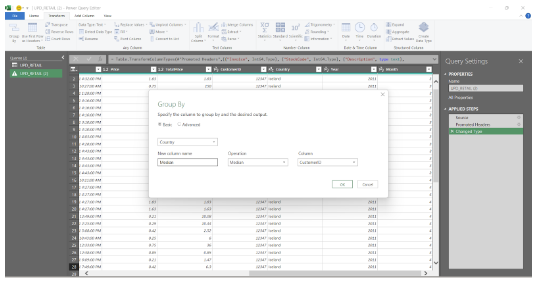


Below is the results of the median:
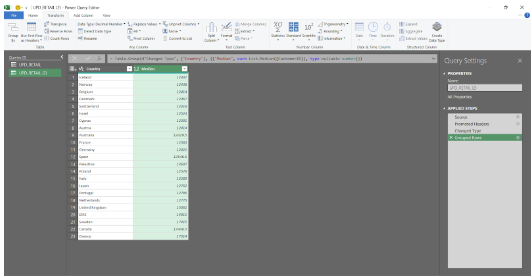

The results of this operation revealed a median value of 14911 for the "CustomerID" in the "EIRE" country. 
Subsequently, these median values were used to fill in the missing data, ensuring a comprehensive and accurate representation of customer IDs 
in the specified country.



     2. Feature Engineering
          a. Introduction of Categorical Features:
To make the dataset more detailed, we added a new category called "Category." 
This extra category, based on the existing data, helps give more information for future analysis.

To create the "Category" column, a systematic approach was undertaken. Keywords existing in the "Description" column were identified, and 
based on their presence, each entry was categorized into a specific group. 
The following formula, implemented in the Power Query Editor using the Add Column button, captures this categorization process:


In [ ]:
= Text.Upper(
    if List.Max({
        Text.Contains([Description], "PEN"),
        Text.Contains([Description], "PENCIL"),
        Text.Contains([Description], "SHARPENER"),
        Text.Contains([Description], "STATIONERY"),
        Text.Contains([Description], "ERASER"),
        Text.Contains([Description], "TAPE")
    }) then "Stationery"
    else if List.Max({
        Text.Contains([Description], "STICKER"),
        Text.Contains([Description], "DESIGN TAPES")
    }) then "Crafts"
    else if List.Max({
        Text.Contains([Description], "FAN"),
        Text.Contains([Description], "KEY-CHAIN"),
        Text.Contains([Description], "PASSPORT COVER"),
        Text.Contains([Description], "PURSE")
    }) then "Accessories"
    else if List.Max({
        Text.Contains([Description], "INCENSE"),
        Text.Contains([Description], "FRAGRANCE OILS"),
        Text.Contains([Description], "INFLATABLE"),
        Text.Contains([Description], "PUSH DOWN RUBBER")
    }) then "Decoration"
    else if List.Max({
        Text.Contains([Description], "DOGGY RUBBER")
    }) then "Pet Accessories"
    else if List.Max({
        Text.Contains([Description], "BALM")
    }) then "Health and Wellness"
    else if List.Max({
        Text.Contains([Description], "FAN BLACK FRAME")
    }) then "Technology"
    else if List.Max({
        Text.Contains([Description], "CAMPING")
    }) then "Outdoor and Adventure Gear"
    else if List.Max({
        Text.Contains([Description], "SCISSOR")
    }) then "Kitchenware"
    else if List.Max({
        Text.Contains([Description], "SNAKE")
    }) then "Toy"
    else "Other"
)


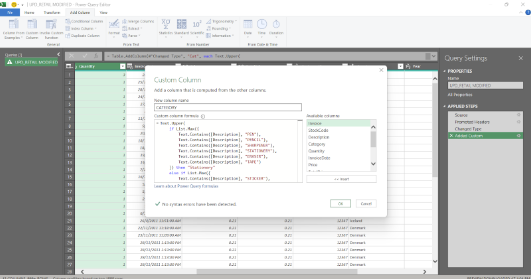

          b. Temporal Feature Addition:

Appended columns for "Year" and "Month" to capture temporal information from the "InvoiceDate." This feature engineering facilitates time-based analysis and allows for a more nuanced understanding of patterns over different periods.

To create column “Year” and “Month”, we add new custom column and add these formulas respectively: 

= Date.Year([InvoiceDate])
= Date.Month([InvoiceDate])

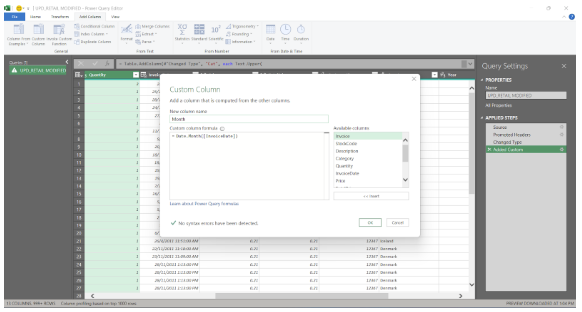

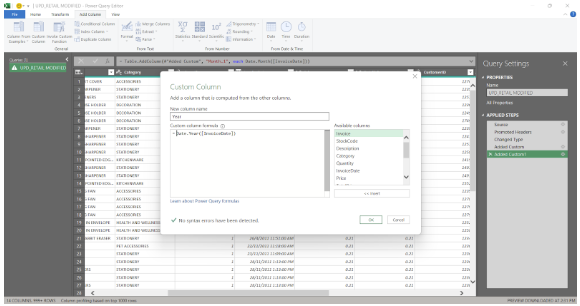


         c. Corrected Total Price Calculation:

We noticed some mistakes in the "TotalPrice" column, so we made a new one
. This new column was calculated more accurately, fixing any errors in the original "TotalPrice" column. We added a custom column with the formula =[Quantity] * [Price] to calculate the corrected total price. After that, we removed the old "TotalPrice" column to keep the dataset consistent

.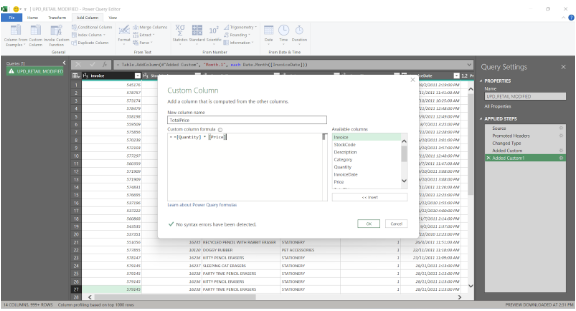






**2.4 Model**

     a. Customer Buying Pattern (Clustering Analysis)
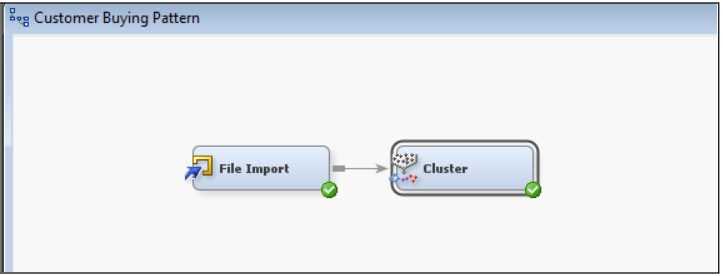

Clustering is used to segment customers based on their similar buying patterns. This is valuable for marketing strategies, as it allows tailoring promotions and campaigns to specific customer segments.

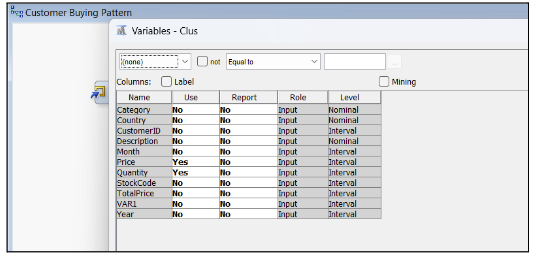

Key Variables: QUANTITY, PRICE.


Results :

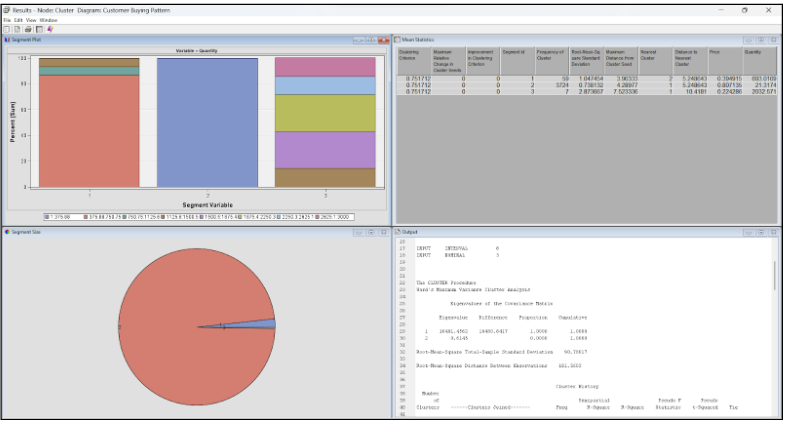




     b. Price Strategizing (Regression Analysis)
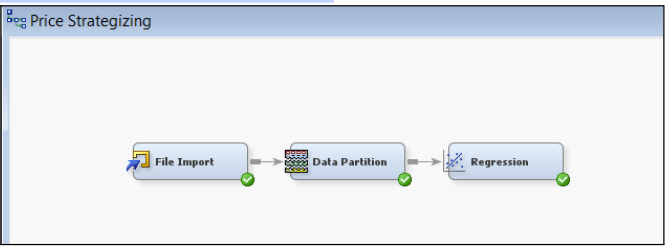

Regression analysis is employed to understand the relationship between PRICE and influencing factors. This helps in formulating effective pricing strategies based on quantitative insights.

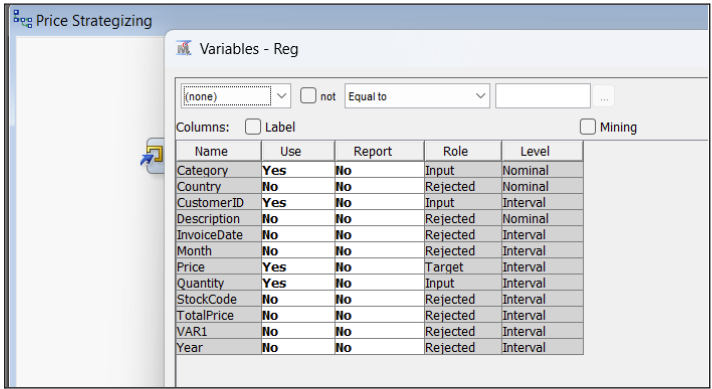

Variable : -
     - Target Variable: PRICE.     - 
Predictors: QUANTITY, CATEGORY, USERI

Results :

D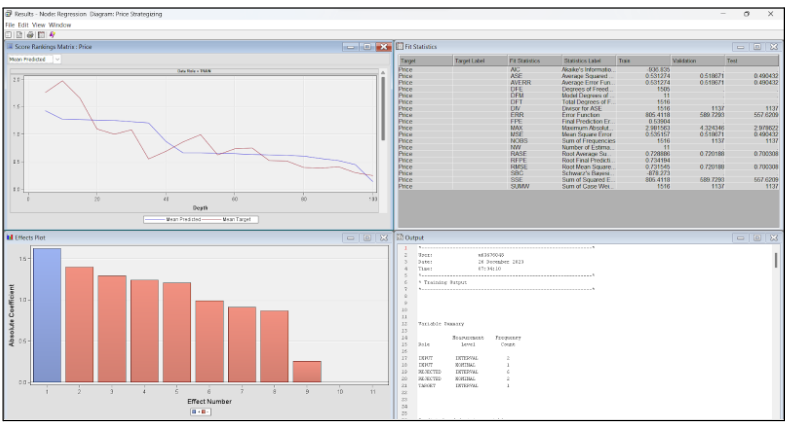





     c. Sales Distribution by Country (k-Nearest Neighbors Classification)
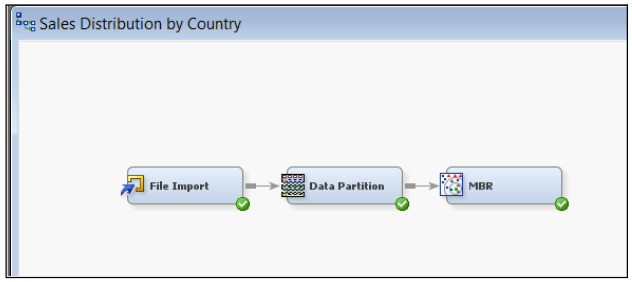

k-Nearest Neighbors (KNN) classification is chosen to predict the sales distribution by country. KNN is a non-parametric algorithm that works well for categorical targets and can handle complex relationships in the data. By considering the k-nearest data points, the algorithm classifies new data points into their respective countries. This method is particularly suitable for identifying patterns in sales distribution where neighboring observations are likely to exhibit similar characteristics.

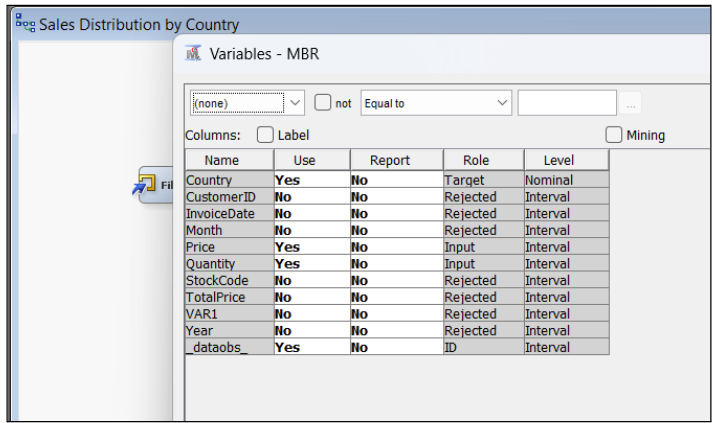

Variables:
     - 
Target Variable: COUNTRY     - .
Predictors: QUANTITY, PRICE, CATEG

Results :

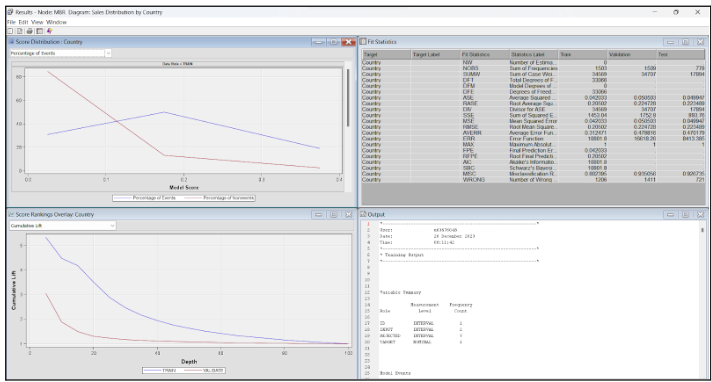ORY




**2.5 Assess**

     a. Customer Buying Pattern (Clustering Analysis)
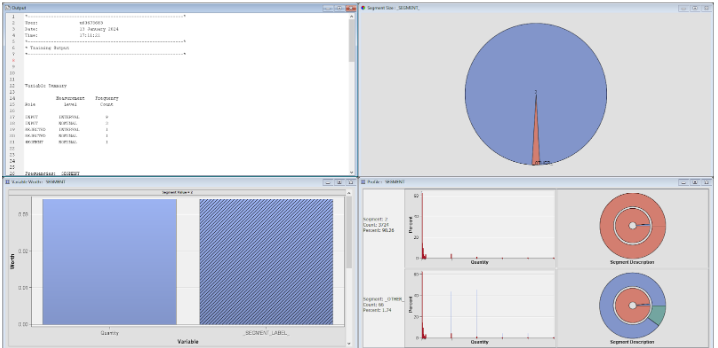

For the Customer buying pattern, we are using Segment Profile to assess our model. Based on the result tab, it shows that there are 2 segments in the dataset compared to our Clustering model that has 3 segments. This may be because Segment Profile merges a few clusters, resulting in reduced numbers of segmentation. Another reason might be because the Segment Profile step could be making decisions based on the profile characteristics, leading to the aggregation or splitting of clusters. This decision-making process might be responsible for the difference in the number of clusters. 

To sum up, the stability of the clustering results can be influenced by various factors including the parameters of the dataset used in the analysis. The profiles or summaries provided by the Segment Profile may also lead to a different grouping of clusters based on the specified criteria for profile creation, which is the Price and Quantity. Since our goal is to create distinct and interpretable segments, the addition of the "Segment Profile" step may help refine the clusters based on specific criteria.



     b. Price Strategizing (Regression Analysis)
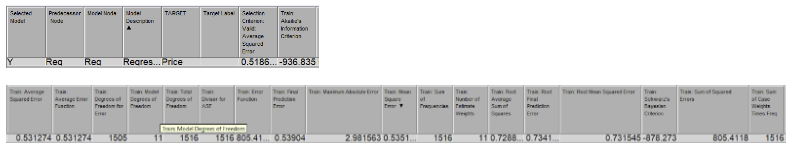

Fit Statistics Table: - 
Based on the table above, we can see that regression model has a good model fit since the value of Train: Average Squared Error=0.53 while Train: Mean Square Error (MSE)=0.53, Train: Schwarz's Bayesian Criterion=-878.27 and Train: Maximum Absolute Error=2.98, which are relatively low. This indicates that the regression model has a good performance

 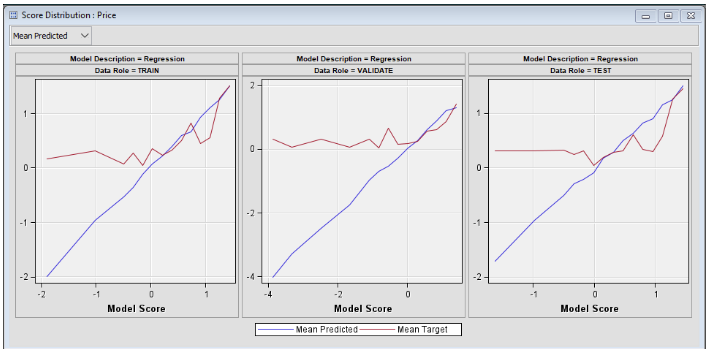

Score distribution: Price chart- 
Based on the chart above, a higher Model Score has a higher Mean Target which suggests a positive relationship between the model's predicted scores and the mean value of the target variable (in this case, "Price"). In other words, the model tends to accurately predict higher values when it assigns higher scores. This positive relationship is desirable in many predictive modeling scenarios, as it indicates that the model is capturing patterns in the data where higher predicted scores are associated with higher actual target values. 


Implications and Limitati- ons
The models might be overfitting to the training data, capturing noise or specific patterns that do not generalize well to new, unseen data. Assessing model performance on validation and test sets might be needed to ensure generalizat- ion.
Model performance heavily depends on the quality and representativeness of the data used for training. If the data is biased or lacks important features, the models may not perform well in real-world scenarios.




     c. Sales Distribution by Country (k-Nearest Neighbors Classification)

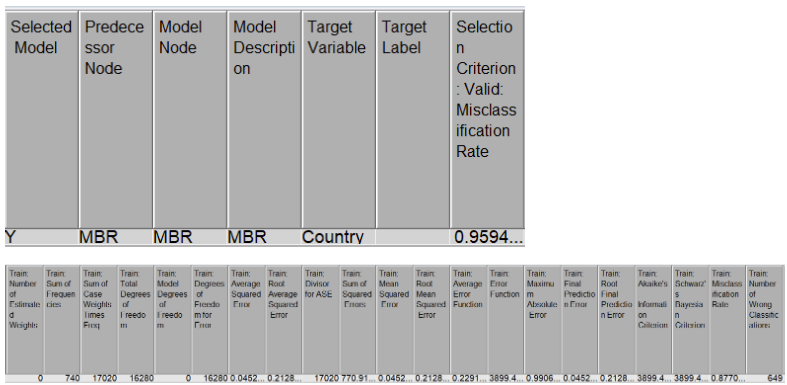

Fit Statistics Table: - 
Based on the table above, we can see that the MBR model has a better model fit since the value of Train: Average Squared Error=0.05 while Train: Mean Square Error (MSE)=0.05 and Train: Maximum Absolute Error=0.99, which are relatively low. This indicates that our model has a good performance. 

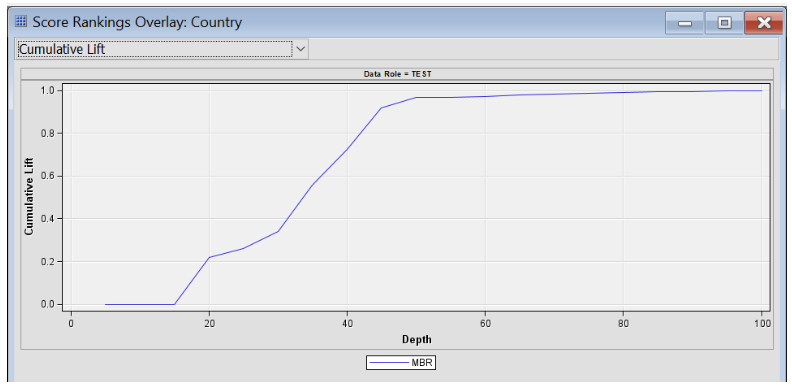

Score Rankings Overlay: Country chart- 
Based on the chart above, a higher Depth with higher Cumulative Lift suggests a positive sign, as it indicates that the model's predictions on the test set are effective at distinguishing between the classes. Higher cumulative lift implies that the model's ranking of observations is superior to random chance. Since this relationship is observed specifically for the TEST data, it suggests that the model's discriminatory power is maintained when applied to new, unseen data. This is a crucial aspect of model evaluation, as it demonstrates the model's ability to generalize beyond the training data.

Implications and Limitation- s:
The model's performance heavily relies on the quality and representativeness of the data used for training and testing. If the data is biased or does not fully capture the variability in the real-world scenarios, the model may not generalize optimal- ly.
While the positive relationship is encouraging, it's crucial to investigate whether the model is overfitting to the specific characteristics of the TEST data. Overfitting could lead to a lack of generalization to new data not represented in the test set.



**Conclusion**

Our journey through the Online Retail II dataset using the SEMMA methodology has proven both enlightening and fruitful. This structured approach, with its emphasis on data exploration, preparation, and modeling, has empowered us to unlock hidden patterns and extract valuable insights from the vast digital sea.
